BRIEF in Image Matching

Gambar jeruk dan apel yang bentuknya mirip

The images contain the same object.


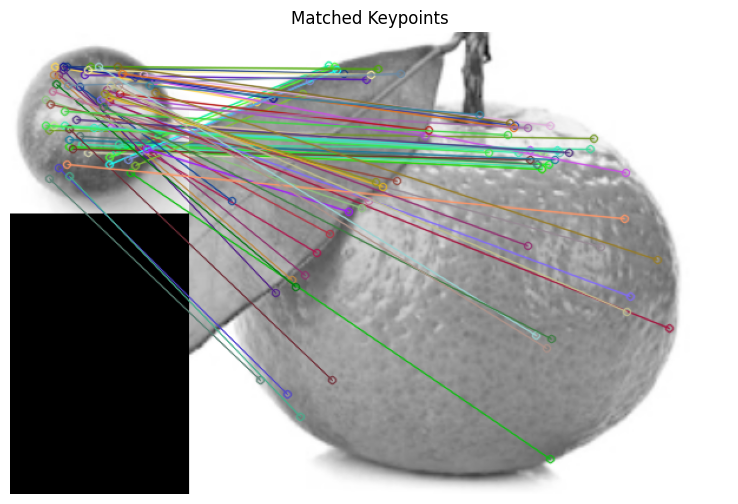

In [93]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def match_images(image1, image2):
    # Initialize BRIEF detector
    fast = cv2.FastFeatureDetector_create()  # * Extractor
    brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

    # Detect keypoints and compute descriptors for both images
    keypoints1 = fast.detect(image1, None)  # * Extractor
    keypoints1, descriptors1 = brief.compute(image1, keypoints1)
    keypoints2 = fast.detect(image2, None)  # * Extractor
    keypoints2, descriptors2 = brief.compute(image2, keypoints2)

    # Create a Brute Force Matcher
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)


    matches = []

    # Match descriptors
    if descriptors1 is not None and descriptors2 is not None:
        matches = bf.match(descriptors1, descriptors2)
        matches = sorted(matches, key=lambda x: x.distance)

    # Compute similarity score based on the number of matches
    similarity_score = len(matches)

    return similarity_score, keypoints1, keypoints2, matches

def main():

    image1 = cv2.imread('test_matching/test_apple1.png', cv2.IMREAD_GRAYSCALE)  # * Image path
    image2 = cv2.imread('test_matching/test_orange2.png', cv2.IMREAD_GRAYSCALE)  # * Image path

    # Match the images
    similarity_score, keypoints1, keypoints2, matches = match_images(image1, image2)


    threshold = 30  # * Threshold


    if similarity_score >= threshold:
        print("The images contain the same object.")
    else:
        print("The images contain different objects.")

    # Plot both images with matched keypoints
    matched_image = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    plt.figure(figsize=(12, 6))
    plt.imshow(matched_image)
    plt.title('Matched Keypoints')
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    main()


Gambar apel dan pisang

The images contain different objects.


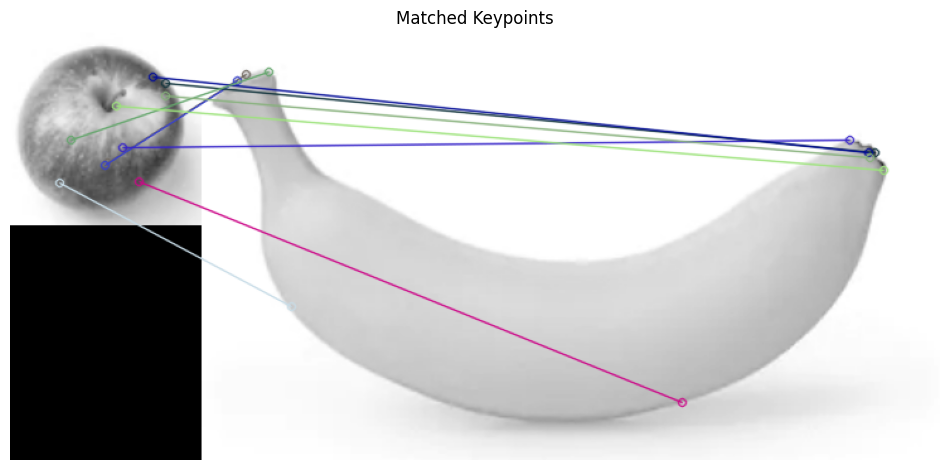

In [95]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def match_images(image1, image2):
    # Initialize BRIEF detector
    fast = cv2.FastFeatureDetector_create()  # * Extractor
    brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

    # Detect keypoints and compute descriptors for both images
    keypoints1 = fast.detect(image1, None)  # * Extractor
    keypoints1, descriptors1 = brief.compute(image1, keypoints1)
    keypoints2 = fast.detect(image2, None)  # * Extractor
    keypoints2, descriptors2 = brief.compute(image2, keypoints2)

    # Create a Brute Force Matcher
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)


    matches = []

    # Match descriptors
    if descriptors1 is not None and descriptors2 is not None:
        matches = bf.match(descriptors1, descriptors2)
        matches = sorted(matches, key=lambda x: x.distance)

    # Compute similarity score based on the number of matches
    similarity_score = len(matches)

    return similarity_score, keypoints1, keypoints2, matches

def main():

    image1 = cv2.imread('test_matching/test_apple1.png', cv2.IMREAD_GRAYSCALE)  # * Image path
    image2 = cv2.imread('test_matching/banana2.png', cv2.IMREAD_GRAYSCALE)  # * Image path

    # Match the images
    similarity_score, keypoints1, keypoints2, matches = match_images(image1, image2)


    threshold = 30  # * Threshold


    if similarity_score >= threshold:
        print("The images contain the same object.")
    else:
        print("The images contain different objects.")

    # Plot both images with matched keypoints
    matched_image = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    plt.figure(figsize=(12, 6))
    plt.imshow(matched_image)
    plt.title('Matched Keypoints')
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    main()


Gambar kedua apel yang sama dengan angle berbeda

The images contain the same object.


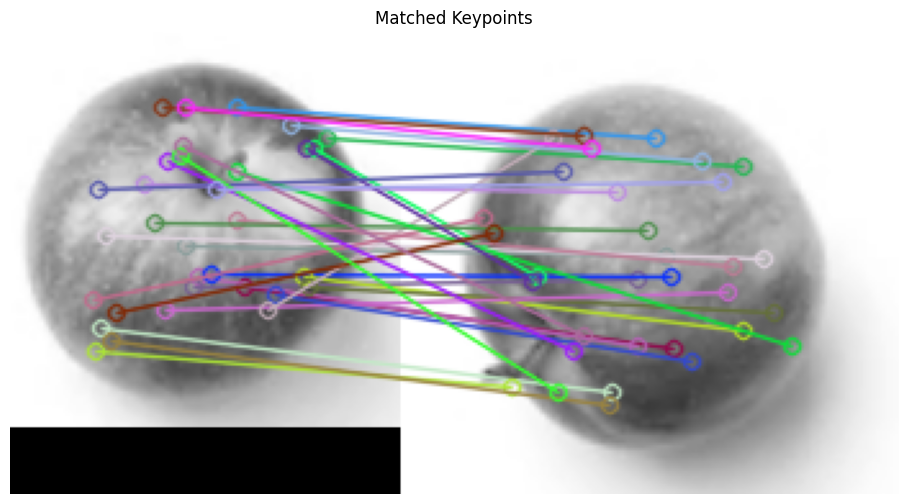

In [96]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def match_images(image1, image2):
    # Initialize BRIEF detector
    fast = cv2.FastFeatureDetector_create()  # * Extractor
    brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

    # Detect keypoints and compute descriptors for both images
    keypoints1 = fast.detect(image1, None)  # * Extractor
    keypoints1, descriptors1 = brief.compute(image1, keypoints1)
    keypoints2 = fast.detect(image2, None)  # * Extractor
    keypoints2, descriptors2 = brief.compute(image2, keypoints2)

    # Create a Brute Force Matcher
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)


    matches = []

    # Match descriptors
    if descriptors1 is not None and descriptors2 is not None:
        matches = bf.match(descriptors1, descriptors2)
        matches = sorted(matches, key=lambda x: x.distance)

    # Compute similarity score based on the number of matches
    similarity_score = len(matches)

    return similarity_score, keypoints1, keypoints2, matches

def main():

    image1 = cv2.imread('test_matching/test_apple1.png', cv2.IMREAD_GRAYSCALE)  # * Image path
    image2 = cv2.imread('test_matching/test_apple2.png', cv2.IMREAD_GRAYSCALE)  # * Image path

    # Match the images
    similarity_score, keypoints1, keypoints2, matches = match_images(image1, image2)


    threshold = 30  # * Threshold


    if similarity_score >= threshold:
        print("The images contain the same object.")
    else:
        print("The images contain different objects.")

    # Plot both images with matched keypoints
    matched_image = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    plt.figure(figsize=(12, 6))
    plt.imshow(matched_image)
    plt.title('Matched Keypoints')
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    main()


Kedua pisang yang sama namun gambarnya terpotong sedikit

The images contain the same object.


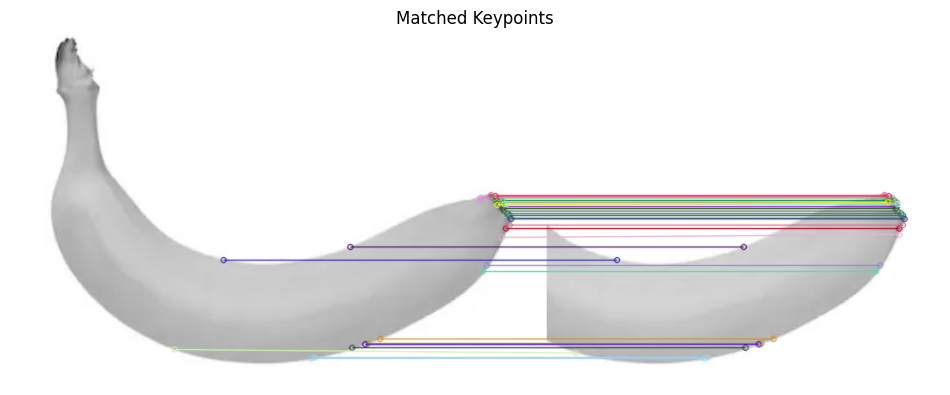

In [102]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def match_images(image1, image2):
    # Initialize BRIEF detector
    fast = cv2.FastFeatureDetector_create()  # * Extractor
    brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

    # Detect keypoints and compute descriptors for both images
    keypoints1 = fast.detect(image1, None)  # * Extractor
    keypoints1, descriptors1 = brief.compute(image1, keypoints1)
    keypoints2 = fast.detect(image2, None)  # * Extractor
    keypoints2, descriptors2 = brief.compute(image2, keypoints2)

    # Create a Brute Force Matcher
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)


    matches = []

    # Match descriptors
    if descriptors1 is not None and descriptors2 is not None:
        matches = bf.match(descriptors1, descriptors2)
        matches = sorted(matches, key=lambda x: x.distance)

    # Compute similarity score based on the number of matches
    similarity_score = len(matches)

    return similarity_score, keypoints1, keypoints2, matches

def main():

    image1 = cv2.imread('test_matching/banana13.png', cv2.IMREAD_GRAYSCALE)  # * Image path
    image2 = cv2.imread('test_matching/banana13_big.png', cv2.IMREAD_GRAYSCALE)  # * Image path

    # Match the images
    similarity_score, keypoints1, keypoints2, matches = match_images(image1, image2)


    threshold = 30  # * Threshold


    if similarity_score >= threshold:
        print("The images contain the same object.")
    else:
        print("The images contain different objects.")

    # Plot both images with matched keypoints
    matched_image = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    plt.figure(figsize=(12, 6))
    plt.imshow(matched_image)
    plt.title('Matched Keypoints')
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    main()


Kedua pisang yang sama namun gambarnya terpotong cukup banyak

The images contain different objects.


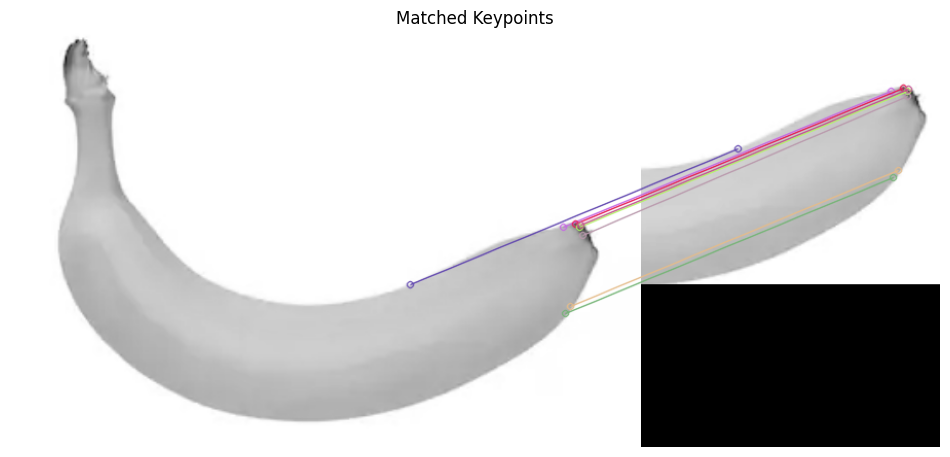

In [103]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def match_images(image1, image2):
    # Initialize BRIEF detector
    fast = cv2.FastFeatureDetector_create()  # * Extractor
    brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

    # Detect keypoints and compute descriptors for both images
    keypoints1 = fast.detect(image1, None)  # * Extractor
    keypoints1, descriptors1 = brief.compute(image1, keypoints1)
    keypoints2 = fast.detect(image2, None)  # * Extractor
    keypoints2, descriptors2 = brief.compute(image2, keypoints2)

    # Create a Brute Force Matcher
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)


    matches = []

    # Match descriptors
    if descriptors1 is not None and descriptors2 is not None:
        matches = bf.match(descriptors1, descriptors2)
        matches = sorted(matches, key=lambda x: x.distance)

    # Compute similarity score based on the number of matches
    similarity_score = len(matches)

    return similarity_score, keypoints1, keypoints2, matches

def main():

    image1 = cv2.imread('test_matching/banana13.png', cv2.IMREAD_GRAYSCALE)  # * Image path
    image2 = cv2.imread('test_matching/banana13_small.png', cv2.IMREAD_GRAYSCALE)  # * Image path

    # Match the images
    similarity_score, keypoints1, keypoints2, matches = match_images(image1, image2)


    threshold = 30  # * Threshold


    if similarity_score >= threshold:
        print("The images contain the same object.")
    else:
        print("The images contain different objects.")

    # Plot both images with matched keypoints
    matched_image = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    plt.figure(figsize=(12, 6))
    plt.imshow(matched_image)
    plt.title('Matched Keypoints')
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    main()


Kedua pisang yang sama dirotate 90 derajat

The images contain different objects.


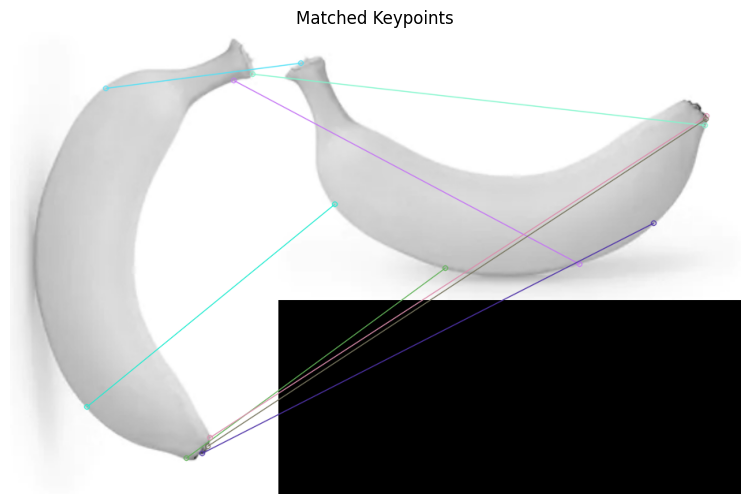

In [104]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def match_images(image1, image2):
    # Initialize BRIEF detector
    fast = cv2.FastFeatureDetector_create()  # * Extractor
    brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

    # Detect keypoints and compute descriptors for both images
    keypoints1 = fast.detect(image1, None)  # * Extractor
    keypoints1, descriptors1 = brief.compute(image1, keypoints1)
    keypoints2 = fast.detect(image2, None)  # * Extractor
    keypoints2, descriptors2 = brief.compute(image2, keypoints2)

    # Create a Brute Force Matcher
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)


    matches = []

    # Match descriptors
    if descriptors1 is not None and descriptors2 is not None:
        matches = bf.match(descriptors1, descriptors2)
        matches = sorted(matches, key=lambda x: x.distance)

    # Compute similarity score based on the number of matches
    similarity_score = len(matches)

    return similarity_score, keypoints1, keypoints2, matches

def main():

    image1 = cv2.imread('test_matching/banana1.png', cv2.IMREAD_GRAYSCALE)  # * Image path
    image2 = cv2.imread('test_matching/banana2.png', cv2.IMREAD_GRAYSCALE)  # * Image path

    # Match the images
    similarity_score, keypoints1, keypoints2, matches = match_images(image1, image2)


    threshold = 30  # * Threshold


    if similarity_score >= threshold:
        print("The images contain the same object.")
    else:
        print("The images contain different objects.")

    # Plot both images with matched keypoints
    matched_image = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    plt.figure(figsize=(12, 6))
    plt.imshow(matched_image)
    plt.title('Matched Keypoints')
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    main()


Kedua pisang yang sama dirotate 45 derajat

The images contain different objects.


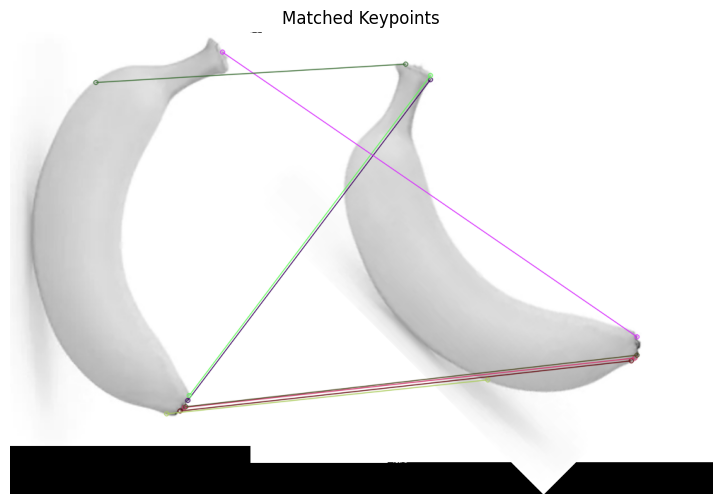

In [114]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def match_images(image1, image2):
    # Initialize BRIEF detector
    fast = cv2.FastFeatureDetector_create()  # * Extractor
    brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

    # Detect keypoints and compute descriptors for both images
    keypoints1 = fast.detect(image1, None)  # * Extractor
    keypoints1, descriptors1 = brief.compute(image1, keypoints1)
    keypoints2 = fast.detect(image2, None)  # * Extractor
    keypoints2, descriptors2 = brief.compute(image2, keypoints2)

    # Create a Brute Force Matcher
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)


    matches = []

    # Match descriptors
    if descriptors1 is not None and descriptors2 is not None:
        matches = bf.match(descriptors1, descriptors2)
        matches = sorted(matches, key=lambda x: x.distance)

    # Compute similarity score based on the number of matches
    similarity_score = len(matches)

    return similarity_score, keypoints1, keypoints2, matches

def main():
    # Load the first image
    image1 = cv2.imread('test_matching/banana1.png', cv2.IMREAD_GRAYSCALE)  # * Image path

    # Rotate the first image by 45 degrees
    rows, cols = image1.shape
    rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), 45, 1)

    # Determine the size of the canvas after rotation
    cos = np.abs(rotation_matrix[0, 0])
    sin = np.abs(rotation_matrix[0, 1])
    new_width = int((rows * sin) + (cols * cos))
    new_height = int((rows * cos) + (cols * sin))

    # Adjust the rotation matrix to fit the entire rotated image
    rotation_matrix[0, 2] += (new_width / 2) - (cols / 2)
    rotation_matrix[1, 2] += (new_height / 2) - (rows / 2)

    # Get the rotated image without cropping
    rotated_image = cv2.warpAffine(image1, rotation_matrix, (new_width, new_height), borderMode=cv2.BORDER_TRANSPARENT)  # * Adjust border mode

    # Match the images
    similarity_score, keypoints1, keypoints2, matches = match_images(image1, rotated_image)


    threshold = 30  # * Threshold


    if similarity_score >= threshold:
        print("The images contain the same object.")
    else:
        print("The images contain different objects.")

    # Plot both images with matched keypoints
    matched_image = cv2.drawMatches(image1, keypoints1, rotated_image, keypoints2, matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    plt.figure(figsize=(12, 6))
    plt.imshow(matched_image)
    plt.title('Matched Keypoints')
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    main()


Apel yang sama dirotate 45 derajat

The images contain different objects.


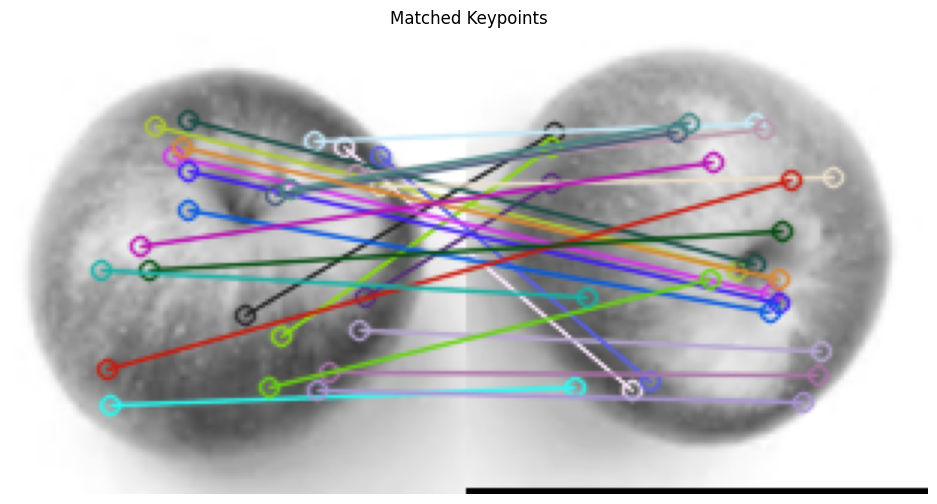

In [118]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def match_images(image1, image2):
    # Initialize BRIEF detector
    fast = cv2.FastFeatureDetector_create()  # * Extractor
    brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

    # Detect keypoints and compute descriptors for both images
    keypoints1 = fast.detect(image1, None)  # * Extractor
    keypoints1, descriptors1 = brief.compute(image1, keypoints1)
    keypoints2 = fast.detect(image2, None)  # * Extractor
    keypoints2, descriptors2 = brief.compute(image2, keypoints2)

    # Create a Brute Force Matcher
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)


    matches = []

    # Match descriptors
    if descriptors1 is not None and descriptors2 is not None:
        matches = bf.match(descriptors1, descriptors2)
        matches = sorted(matches, key=lambda x: x.distance)

    # Compute similarity score based on the number of matches
    similarity_score = len(matches)

    return similarity_score, keypoints1, keypoints2, matches

def main():

    image1 = cv2.imread('test_matching/test_apple1.png', cv2.IMREAD_GRAYSCALE)  # * Image path
    image2 = cv2.imread('test_matching/test_apple1_rotated.png', cv2.IMREAD_GRAYSCALE)  # * Image path

    # Match the images
    similarity_score, keypoints1, keypoints2, matches = match_images(image1, image2)


    threshold = 30  # * Threshold


    if similarity_score >= threshold:
        print("The images contain the same object.")
    else:
        print("The images contain different objects.")

    # Plot both images with matched keypoints
    matched_image = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    plt.figure(figsize=(12, 6))
    plt.imshow(matched_image)
    plt.title('Matched Keypoints')
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    main()


KESIMPULAN
- Distance: Program ini bisa mendeteksi objek yang sama meskipun berada dalam jarak yang cukup jauh.
- Angle: Jika objek difoto dari sudut yang bedanya terlalu ekstrim (mis: bagian dpn dan blkg), maka program ini tidak akan dapat mengenali objek tersebut. Namun jika angle nya tidak terlalu ekstrim(depan dan samping) maka program masih dapat mengenalinya.
- Brightness: Begitu pula jika brightnessnya diubah, jika hanya sedikit maka objek tersebut masih dapat dikenali, namun jika brightnessnya cukup kontras maka objek tidak akan dapat dikenali lagi.
- Crop: Jika kedua gambar yang sama dipotong, selama fitur uniknya masih ada dalam jumlah yang cukup (lebih besar dari treshold) maka program ini masih dapat mengenali objek tersebut. Namun jika bagian yang terpotong adalah sebagian besar dari fitur uniknya, maka gambar tidak akan dapat di matching kan lagi.
- Rotate: sangat sensitive terhadap rotasi, meskipun bentuknya mirip lingkaran dan hanya diputar sedikit, program lgsg tdk bisa mengenalinya.
- Accuracy: Tidak terlalu bagus karena jika objeknya berbeda namun bentuknya mirip, maka program akan mengenalinya sebagai kedua objek yang sama. Namun jika bentuknya jauh berbeda, maka program akan mengenalinya sebagai objek yang berbeda.

Extractor -> Key Points -> Descriptor